### Importing the libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import os
import warnings
from re import search
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

Getting and setting the current working directory is important because sometimes we will be working with data that is updated every few hours/days. In this situation, downloading the data(if it is small)/ connecting it to an instance of the database will give us static data to work with. We can always activate the connction to work with the latest data.

In [7]:
os.getcwd()

'c:\\Users\\manit\\OneDrive\\Desktop\\Projects\\Data science Salary estimator'

In [8]:
os.chdir('/Users/manit/OneDrive/Desktop/Projects/Data science Salary estimator')

In [9]:
raw_data=pd.read_csv('glassdoor_jobs.csv')

In case of a mistake or deletion of data, we would have to import the data again but this step will function as a backup to return to our original state in case of a mistake.

In [10]:
data=raw_data.copy()
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,26-05-1905,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,06-06-1905,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,02-07-1905,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,18-05-1905,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,20-06-1905,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Getting an overview of our dataset
The info() method in python is used to get an outlook of our coloumns and their respective types and it also gives information whether the columns have null values or not. This step is necessary because, we can get an overview of the types of columns in our data.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    object 
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 112.2+ KB


### Missing values 
The function below is used to check for missing values in our dataset. Output is in the form of a dataframe so reading it is easy.

In [12]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
Unnamed: 0,0,0.0
Job Title,0,0.0
Salary Estimate,0,0.0
Job Description,0,0.0
Rating,0,0.0
Company Name,0,0.0
Location,0,0.0
Headquarters,0,0.0
Size,0,0.0
Founded,0,0.0


Luckily there are no missing values in our data. Now we move on to the next step of cleaning the data because the data is messy and gathering insights from this messy data is not going to be of any use for us.

Checking the head of the data again to get an overview of what to do with the data

In [13]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,26-05-1905,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,06-06-1905,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,02-07-1905,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,18-05-1905,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,20-06-1905,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Before cleaning the data, noting down the columns to clean and how to clean them will help us while doing the task and this will be useful when others look at the code.

#### Observations:

1) The column unnamed is unnecessary and can be removed.

2) Salary Estimate: Can remove the strings in between the two numbers in this column and can add another column to our dataset (minimum salary and maximum salary). If necessary can add a mean salary column.

3) Company Name: Company name also contains rating which is already available to us in the "Rating" column. Keeping the rating here will not be of any use and will be removed.

4) Location: Contains both the location and state. Splitting this into two columns : "Location" and "State" will help us in our analysis.

5) Headquarters: Not changing this column because I do not think this is going to be useful for my analysis. Will clean the data if needed.

6) Size: Contains unnecessary wordings, removing them. Better to remove the wordings and split them into minimum and maximum employees columns or an average employee column will give a better perspective of the company.

7) Competitors: Field has a lot of -1(missing values). Can get the number of competitors and can assign 0 if the number is -1.

8) Revenue:

In [14]:
# Removing competitors column
data.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

#### Competitors

In [15]:
data['Competitors']=data['Competitors'].apply(lambda x: 0 if x=='-1' else len(x.split(',')))
data['Competitors'].value_counts()

0    634
3    253
2     50
1     18
4      1
Name: Competitors, dtype: int64

In [16]:
data['Company Name'] = data['Company Name'].str.split("\n").str[0]
data['Company Name'].value_counts().sort_values(ascending=False).head(20)

Novartis                                           14
MassMutual                                         14
Takeda Pharmaceuticals                             14
Reynolds American                                  14
Software Engineering Institute                     13
The Church of Jesus Christ of Latter-day Saints    13
Liberty Mutual Insurance                           10
PNNL                                               10
AstraZeneca                                         9
Alector                                             8
MITRE                                               8
Fareportal                                          7
Rochester Regional Health                           7
Advanced BioScience Laboratories                    7
Numeric, LLC                                        7
Pfizer                                              7
Esri                                                6
Beebe Healthcare                                    6
Apellis Pharmaceuticals     

#### Company Name


### Sales

Removing -1 columns in our data because determining how much salary they are earning is tough.

In [17]:
data=data[data['Salary Estimate']!='-1']

### Salary

In [18]:
data['Salary Estimate']=data['Salary Estimate'].str.split('(').str[0]

In [19]:
# Replacing the $ and k values
data['Salary Estimate']=data['Salary Estimate'].str.replace('$','')
data['Salary Estimate']=data['Salary Estimate'].str.replace('K','')

In [20]:
data['hourly']=data['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)


In [21]:
data['employer_provided_salary']=data['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [22]:
data['Salary Estimate']=data['Salary Estimate'].apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

In [23]:
data['min_salary']=data['Salary Estimate'].str.split('-').str[0]
data['max_salary']=data['Salary Estimate'].str.split('-').str[1]

In [24]:
data[['min_salary','max_salary']]=data[['min_salary','max_salary']].apply(pd.to_numeric,axis=1)

In [25]:
data['average_salary']=(data['min_salary']+data['max_salary'])/2

### Adding a state column 

In [26]:
data['state']=data['Location'].str.split(',').str[1]
data['state']=data['state'].str.replace('Los Angeles','LA')

### Size

In [27]:
data['Size']=data['Size'].apply(lambda x: x.split('e')[0])

### Companies with headquarters and location in the same state?

In [28]:
data['same_state']= data.apply(lambda x: 1 if x.Location==x.Headquarters else 0,axis=1)

#### Senior positions

In [29]:
data['Senior'] = data['Job Title'].apply(lambda x: 1 if 'Senior' in x or 'Sr' in x else 0 )
data['Senior'].value_counts()

0    573
1    169
Name: Senior, dtype: int64

#### Research Positions

In [30]:
data['research_positions'] = data['Job Title'].apply(lambda x: 1 if 'research' in x.lower() else 0 )
data['research_positions'].value_counts()

0    714
1     28
Name: research_positions, dtype: int64

#### Data Engineers

In [31]:
data['engineers'] = data['Job Title'].apply(lambda x: 1 if 'data engineer' in x.lower() else 0 )
data['engineers'].value_counts()

0    623
1    119
Name: engineers, dtype: int64

#### Data Scientist Positions

In [32]:
data['scientist'] = data['Job Title'].apply(lambda x: 1 if 'data scientist' in x.lower() else 0 )
data['scientist'].value_counts()

0    463
1    279
Name: scientist, dtype: int64

#### Managerial positions

In [33]:
data['manager'] = data['Job Title'].apply(lambda x: 1 if 'manager' in x.lower() else 0 )
data['manager'].value_counts()

0    717
1     25
Name: manager, dtype: int64

#### Analysts

In [34]:
data['analyst'] = data['Job Title'].apply(lambda x: 1 if 'analyst' in x.lower() else 0 )
data['analyst'].value_counts()

0    639
1    103
Name: analyst, dtype: int64

### The different positions in the dataset

In [35]:
positions= data[['Senior','research_positions','analyst','scientist','manager','engineers']]
value=[]
def position(positions):
    for index,values in enumerate(positions):
        value.append(positions[values].value_counts()[1])
    dataz={'Job Listings':['Senior','Research','Analyst','Data Scientist','Manager','Data Engineers'],'Count':value}
    data_positons=pd.DataFrame(dataz)
    return data_positons.sort_values(by='Count',ascending=False)
z=position(positions)
z.style.background_gradient(cmap="Blues")

,Job Listings,Count
3,Data Scientist,279
0,Senior,169
5,Data Engineers,119
2,Analyst,103
1,Research,28
4,Manager,25


#### Adding another column for the positions of junior and seniors

In [36]:
def seniority(x):
    if 'sr' in x.lower() or 'Senior' in x.lower() or 'Lead' in x.lower():
        return 'senior'
    elif 'Junior' in x.lower() or 'jr' in x.lower():
        return 'junior'
    else:
        return 'none'
data['Seniority']=data['Job Title'].apply(seniority)
data['Seniority'].value_counts()

none      694
senior     46
junior      2
Name: Seniority, dtype: int64

#### Adding other column for data analyst, data scientist , data engineers and research positions.

Adding for only these roles because these are relavant for my analysis

In [37]:
def roles(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'analyst' in x.lower():
        return 'data analyst'
    elif 'data engineer' in x.lower():
        return 'data engineer'
    elif 'research' in x.lower():
        return 'research'
    else:
        return 'other positions'
data['Job Title']=data['Job Title'].apply(roles)
data['Job Title'].value_counts()

data scientist     279
other positions    216
data engineer      118
data analyst       103
research            26
Name: Job Title, dtype: int64

In [38]:
data[['min_salary','max_salary','average_salary','Rating','Competitors']]=data[['min_salary','max_salary','average_salary','Rating','Competitors']].apply(pd.to_numeric, axis = 1)

In [39]:
data[['min_salary','max_salary','average_salary']]=data[['min_salary','max_salary','average_salary']]*1000

### Revenue

In [40]:
data['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

Checking how many job postings are listed by companies based on their revenue.

Text(0.5, 1.0, 'Job Postings')

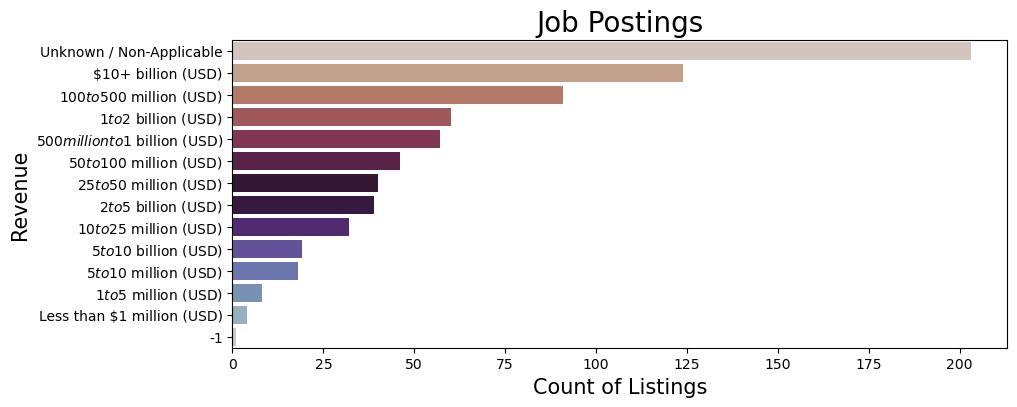

In [41]:
data['Revenue'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,4))
sns.countplot(y='Revenue',data=data,order = data['Revenue'].value_counts().index,palette='twilight_r')
plt.xlabel('Count of Listings',size=15)
plt.ylabel('Revenue',size=15)
plt.title('Job Postings',size=20)

There are many companies with unknown/Non-Applicable revenue and the companies with largest revenue are hiring the most number of employees.

Average salary given to the employees by these companies. Not considering the role of the candidate.

##### What we can infer from the above plot is that the companies that are earning more will be paying more for the candidates. So, let's create a hypothesis that:Companies that draw in huge revenues also give the highest average salary.

Text(0.5, 1.0, 'Revenue and Average Salary')

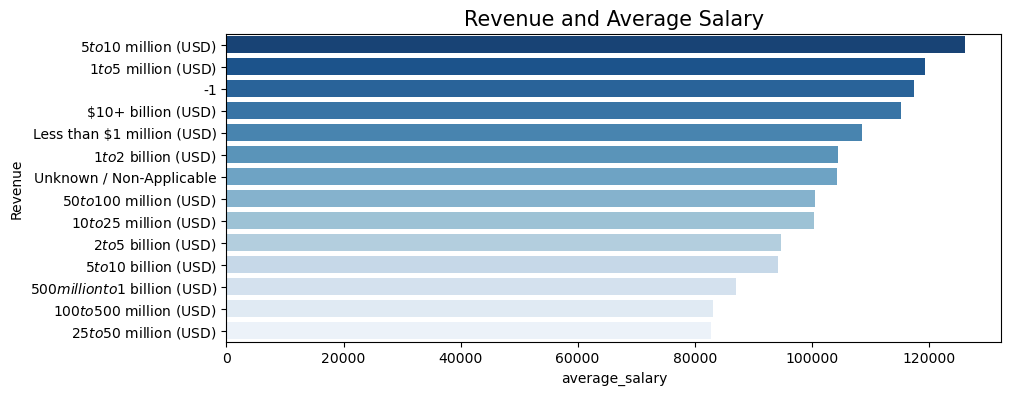

In [42]:
revenue_size = data.groupby(by='Revenue')['average_salary'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x=revenue_size['average_salary'],y=revenue_size['Revenue'],palette='Blues_r')
plt.title('Revenue and Average Salary',size=15)


We cannot reject the hypothesis because - from the above 2 figures it is evident that companies with huge revenue are listing jobs for high average salary. This is well known to everyone because if the company is not earning, it will not have money to pay its employees and in-turn will not be open to hiring.

In [43]:
revenue_seniority = pd.DataFrame(data.groupby(by=['Revenue','Seniority'])['average_salary'].mean())
revenue_seniority

average_salary
Revenue                          Seniority                
$1 to $2 billion (USD)           junior      106500.000000
                                 none        103008.771930
                                 senior      147000.000000
$1 to $5 million (USD)           none        119312.500000
$10 to $25 million (USD)         none        100359.375000
$10+ billion (USD)               none        114325.688073
                                 senior      121266.666667
$100 to $500 million (USD)       none         80869.047619
                                 senior      110571.428571
$2 to $5 billion (USD)           none         93666.666667
                                 senior      107500.000000
$25 to $50 million (USD)         junior       56500.000000
                                 none         80263.888889
                                 senior      122500.000000
$5 to $10 billion (USD)          none         92264.705882
                                 senior      110500.000000
$5 to $10 million (USD)          none        124411.764706
                                 senior      155000.000000
$50 to $100 million (USD)        none        100565.217391
$500 million to $1 billion (USD) none         87888.888889
                                 senior       70833.333333
-1                               none        117500.000000
Less than $1 million (USD)       none        108625.000000
Unknown / Non-Applicable         none        104787.564767
                                 senior       95100.000000

#### Distribution of average_salary and Rating

<AxesSubplot:xlabel='Rating', ylabel='Count'>

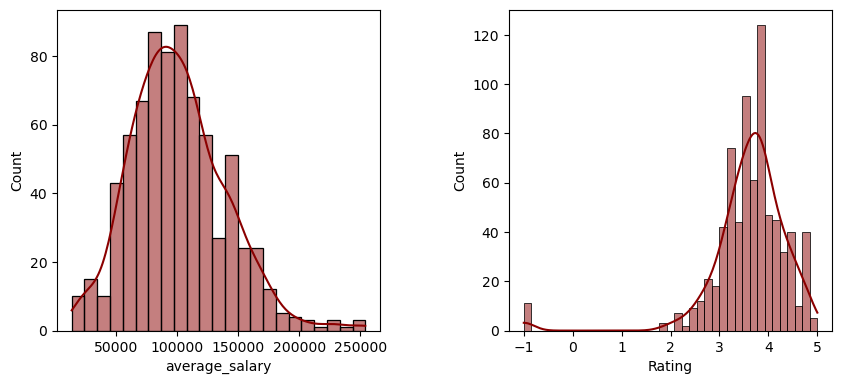

In [44]:
data_numerical=data[['average_salary','Rating','Competitors']]
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
sns.histplot(ax=ax0,x=data['average_salary'],color='darkred',kde=True,alpha=0.5)
sns.histplot(ax=ax1,x=data['Rating'],color='darkred',kde=True,alpha=0.5)

The distributions appear to be normal. But for further confirmation, checking the skewness and kurtosis will give us better clarity. Usually kurtosis in the range -3 to +3 is accepted.

#### Skewness and Kurtosis of the above histograms

In [45]:
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,average_salary,0.609474,0.889196
1,Rating,-2.814020,14.304127
2,Competitors,0.613365,-1.549975


The average_salary and competitors follows a normal distribution but for Rating column the kurtosis is 14 that is 11 more than the accepted value (accepted value of kurtosis is -3 to +3. Have to normalize/standardize this column for the machine learning model because when applying regression, the predictions will be not accurate if the distribution is not normal.

<AxesSubplot:>

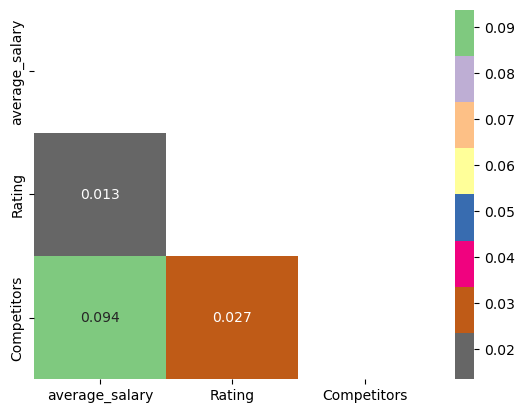

In [46]:
matrix = np.triu(data_numerical.corr())
colors=['lightblue','grey']
sns.heatmap(data=data_numerical.corr(), annot=True, mask=matrix,cmap='Accent_r')

#### Earnings of the above positions (average salary estimate)

In [47]:
position_salary = data.groupby(by='Job Title')['average_salary'].mean().sort_values(ascending=True).reset_index()
colors = ['lightslategray',] * 5
colors[4] = 'crimson'
fig = go.Figure(data=[go.Bar(
    y=position_salary['average_salary'],
    x=position_salary['Job Title'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Average Salary')



#### Job offerings depending on the position in our data.

In [48]:
job_offerings=data.groupby(by=['Job Title','Seniority'])['Size'].count()
job_offerings=pd.DataFrame(job_offerings)
job_offerings.style.background_gradient(cmap="Blues")

##### Average Salary estimates based on positions and the job title

In [49]:
salary_estimate = data.groupby(by=['Job Title','Seniority'])['average_salary'].mean()
salary_estimate=pd.DataFrame(salary_estimate)
salary_estimate.style.highlight_max(color = 'lightblue', axis = 0)

#### Average salaries of job titles

As the average_salary column is already created (contains the average salaries of each postings). We can check how much we can expect to get for  single posting by doing the average of the titles.

In [50]:
salaries_titles = pd.pivot_table(data=data,index=data['Job Title'],values='average_salary',aggfunc='mean').reset_index()
salaries_titles.style.highlight_max(color = 'lightblue', axis = 0)

,Job Title,average_salary
0,data analyst,65786.407767
1,data engineer,105800.847458
2,data scientist,117564.516129
3,other positions,92518.518519
4,research,100750.000000


On average, data scientists are earning more than other types followed by data engineer and research positions (research may be research scientist/research analyst).

### Companies and their number of job listings?

In [51]:
companies_hiring=data['Company Name'].value_counts().sort_values(ascending=False).reset_index().head(10)
companies_hiring.style.background_gradient(cmap="Blues")

,index,Company Name
0,MassMutual,14
1,Takeda Pharmaceuticals,14
2,Reynolds American,14
3,Software Engineering Institute,11
4,PNNL,10
5,Liberty Mutual Insurance,10
6,AstraZeneca,9
7,MITRE,8
8,Pfizer,7
9,Rochester Regional Health,7


MassMutual, Reynolds American, Takeda Pharmaceuticals are hiring the most number of employees. The other companies are not far in numbers. Surprisingly, FAANG companies are not hiring in huge quantities.

#### Are these companies giving out the most salaries?

In [52]:
companies_salaries=data.groupby('Company Name')['average_salary'].mean().sort_values(ascending=False).reset_index().head(15)
#companies_salaries.style.background_gradient(cmap="Blues")
companies_salaries['Company Name'].values

array(['Gallup', 'Sage Intacct', 'CA-One Tech Cloud', 'Grand Rounds',
       'Credit Sesame', 'The Climate Corporation', 'Grainger',
       'Samsung Research America', 'Nektar Therapeutics', 'DTCC',
       'Two Sigma', 'BioMarin Pharmaceutical', 'Confluent',
       'Quartet Health', 'Samba TV'], dtype=object)

The companies with the highest job listings are not the ones giving out the highest salaries.

In [53]:
companies_15 = ['Gallup', 'Sage Intacct', 'CA-One Tech Cloud', 'Grand Rounds',
       'Credit Sesame', 'The Climate Corporation', 'Grainger',
       'Samsung Research America', 'Nektar Therapeutics', 'DTCC',
       'Two Sigma', 'BioMarin Pharmaceutical', 'Confluent',
       'Quartet Health', 'Samba TV']

In [54]:
data_companies = data[data['Company Name'].isin(companies_15)]

In [55]:
data_companies1 = data_companies.groupby(['Company Name','Job Title','Seniority'])['average_salary'].mean().sort_values(ascending=False).reset_index()
data_companies1 = pd.DataFrame(data_companies1)
data_companies1

,Company Name,Job Title,Seniority,average_salary
0,Gallup,data scientist,none,237500.0
1,Sage Intacct,other positions,none,232500.0
2,CA-One Tech Cloud,data scientist,none,225000.0
3,Grand Rounds,other positions,none,221500.0
4,Credit Sesame,data engineer,none,205000.0
5,The Climate Corporation,data scientist,none,194000.0
6,Grainger,other positions,none,179500.0
7,Samsung Research America,data engineer,none,177000.0
8,Nektar Therapeutics,other positions,senior,174000.0
9,DTCC,data analyst,none,173000.0


#### Job listing with the highest salary ( state, company's name, size and revenue)


In [56]:
data[data['max_salary']==data['max_salary'].max()][['Seniority','Company Name','Location','max_salary']]

,Seniority,Company Name,Location,max_salary
452,none,Liberty Mutual Insurance,"Chicago, IL",306000.0
675,none,Liberty Mutual Insurance,"Chicago, IL",306000.0
913,none,Liberty Mutual Insurance,"Chicago, IL",306000.0


#### Job listing with the highest salary ( state, company's name, size and revenue)


In [57]:
data[data['min_salary']==data['min_salary'].min()][['Revenue','Size','Company Name','Location','max_salary']]

,Revenue,Size,Company Name,Location,max_salary
523,$2 to $5 billion (USD),5001 to 10000,FLEETCOR,"Nashville, TN",17000.0
787,$2 to $5 billion (USD),5001 to 10000,FLEETCOR,"Nashville, TN",17000.0


#### Top 10 job postings by state.

#### How many states are hiring?


In [58]:
data['state'].nunique()

37

In [59]:
state_openings=data['state'].value_counts().sort_values(ascending=True).reset_index().tail(15)
fig = px.bar(state_openings, y='index', x='state',title='Top 15 job postings by state',text='state')
fig.show()

Another question that popus up when we look at this graph is : What states are listing jobs with high base salary? We can check this by grouping with state and adding the average_salaries for each individual states.

In [60]:
state_salaries=data.groupby('state')['average_salary'].mean().sort_values(ascending=False).reset_index().tail(10)
fig = px.bar(state_salaries, y='state', x='average_salary',title='Top 10 states and their total average salary',text='average_salary')
fig.show()


Text(0.5, 1.0, 'Top 10 States and their average salary')

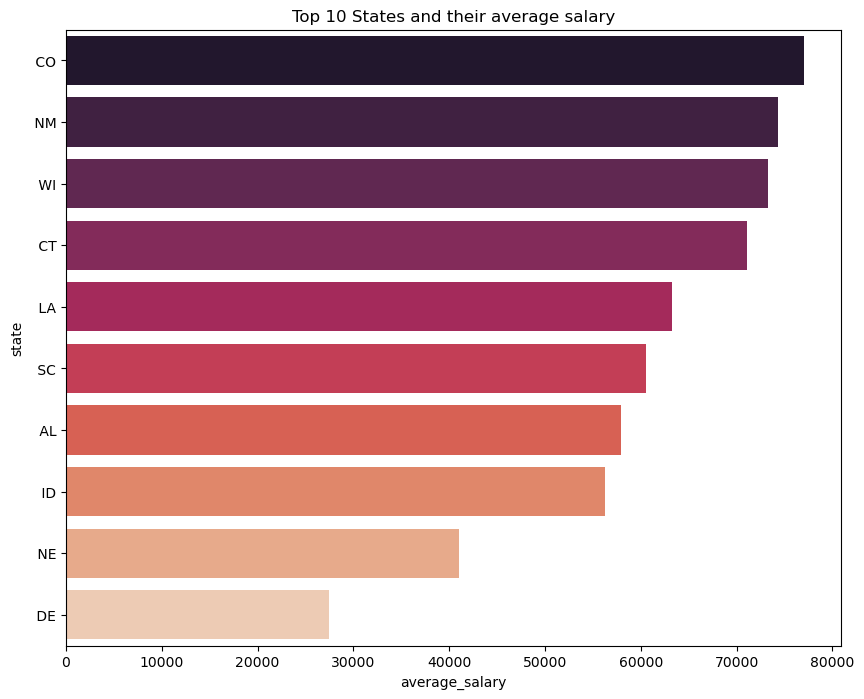

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(data=state_salaries, y='state', x='average_salary',palette='rocket')
plt.title('Top 10 States and their average salary')

In [62]:
state_seniority = data.groupby(by=['state','Job Title'])['average_salary'].mean()
state_seniority=pd.DataFrame(state_seniority)
state_seniority

average_salary
state Job Title                      
 AL   data analyst       62200.000000
      data engineer      65000.000000
      other positions    43750.000000
 AZ   data analyst       55000.000000
      data engineer      79500.000000
...                               ...
 WA   data scientist     99764.705882
      other positions    97500.000000
 WI   data analyst       58833.333333
      data scientist    113500.000000
      other positions    54000.000000

[109 rows x 1 columns]

##### Displaying the above dataframe as a figure is a tedious task. As this is an important finding from our analysis, we can display it in visualizaton softwares like tableau and further anaysis about this information can be performed there.

## Rating

How are the companies rated in our data?

In [63]:
data['Rating'].nunique()

31

In [64]:
print(data['Rating'].min(),data['Rating'].max())

-1.0 5.0


The minimum rating is -1 and the maximum rating is 5

Text(0.5, 1.0, 'Rating Distribution')

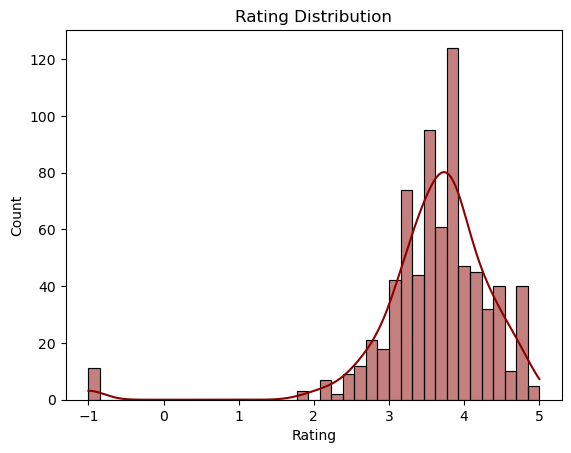

In [65]:
sns.histplot(x=data['Rating'],color='darkred',kde=True,alpha=0.5)
plt.title('Rating Distribution')

There are only 5 companies with the highest rating and 11 companies with the lowest(-1) rating. Rest of the companies come between these 2 and most of the companies ratings are in the range 3.1-4.0

##### What are the companies with the highest rating?

In [66]:
data[data['Rating']==5]['Company Name']

48         BPA Services
161         Gridiron IT
477        BPA Services
542    Royce Geospatial
893             SkySync
Name: Company Name, dtype: object

##### Companies with the least rating?

In [67]:
data[data['Rating']==-1]['Company Name']

208          CA-One Tech Cloud
331          CA-One Tech Cloud
377                       Muso
472                 Kronos Bio
518                 Kronos Bio
583                       ALIN
703                 Kronos Bio
741    Monte Rosa Therapeutics
778                 Kronos Bio
819                 Kronos Bio
943                 Kronos Bio
Name: Company Name, dtype: object

##### How many companies have headquarters in the same state?

In [68]:
data['same_state'].value_counts()

1    414
0    328
Name: same_state, dtype: int64

Most of the companies have headquarters in the same state.

##### Ratings and salaries

In [69]:
rating_salary = data.groupby('Rating')['average_salary'].sum().sort_values(ascending=False).reset_index()
rating_salary

,Rating,average_salary
0,3.9,7123500.0
1,3.7,6352000.0
2,3.8,5905500.0
3,3.5,5140000.0
4,4.0,4951000.0
5,3.4,4092500.0
6,3.3,3972500.0
7,3.6,3931500.0
8,3.2,3692500.0
9,4.4,3584000.0


#### Company Type

In [70]:
company = data['Type of ownership'].value_counts().sort_values(ascending=True).reset_index()
fig = px.bar(company, y='index', x='Type of ownership',title='Type of Ownership',text='Type of ownership')
fig.show()

Most of the companies that are hiring are private companies followed by public companies.

In [71]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,state,same_state,Senior,research_positions,engineers,scientist,manager,analyst,Seniority
0,data scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000,26-05-1905,Company - Private,...,72000.0,NM,0,0,0,0,1,0,0,none
1,data scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,06-06-1905,Other Organization,...,87500.0,MD,0,0,0,0,1,0,0,none
2,data scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000,02-07-1905,Company - Private,...,85000.0,FL,1,0,0,0,1,0,0,none
3,data scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000,18-05-1905,Government,...,76500.0,WA,1,0,0,0,1,0,0,none
4,data scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,20-06-1905,Company - Private,...,114500.0,NY,1,0,0,0,1,0,0,none


##### Top 10 sectors 

In [72]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'state', 'same_state', 'Senior', 'research_positions',
       'engineers', 'scientist', 'manager', 'analyst', 'Seniority'],
      dtype='object')

In [73]:
data['Sector'].value_counts().sort_values(ascending=False).head(10)

Information Technology       180
Biotech & Pharmaceuticals    112
Business Services             97
Insurance                     69
Health Care                   49
Finance                       42
Manufacturing                 34
Aerospace & Defense           25
Education                     23
Retail                        15
Name: Sector, dtype: int64

IT, Biotech & Pharmaceuticals, Business Services, Insurance, Healthcare, Finance are hiring in large number. Applying to these companies will net in interviews and jobs if the candidate is eligible.

#### Sectors and level of seniority with their average_salary

One question that arises when we want to know which sector to apply to is : How much are the sector's paying for their employees. We can do this with the help of pandas groupby

In [74]:
z=data.groupby(by=['Sector','Seniority'])['average_salary'].mean()
z=pd.DataFrame(z)
z

average_salary
Sector                             Seniority                
-1                                 none        114650.000000
Accounting & Legal                 none        113500.000000
Aerospace & Defense                none         99060.000000
Agriculture & Forestry             none         80500.000000
Arts, Entertainment & Recreation   none         48500.000000
Biotech & Pharmaceuticals          none        110747.368421
                                   senior      117470.588235
Business Services                  junior       56500.000000
                                   none         97277.777778
                                   senior      110916.666667
Construction, Repair & Maintenance none         26500.000000
Consumer Services                  none         99875.000000
Education                          none        100739.130435
Finance                            none         97369.047619
Government                         junior      106500.000000
                                   none         75750.000000
Health Care                        none         66173.913043
                                   senior       89833.333333
Information Technology             none        113351.428571
                                   senior      107600.000000
Insurance                          none        104564.516129
                                   senior      118142.857143
Manufacturing                      none         84044.117647
Media                              none        116666.666667
Mining & Metals                    none        104000.000000
Non-Profit                         none         68611.111111
Oil, Gas, Energy & Utilities       none         80464.285714
Real Estate                        none        104750.000000
Retail                             none        100272.727273
                                   senior       98000.000000
Telecommunications                 none        102333.333333
Transportation & Logistics         none         94400.000000
                                   senior      107500.000000
Travel & Tourism                   none         64428.571429
                                   senior      105000.000000

In [75]:
sector_seniority = data.groupby(by=['Sector','Seniority'])['average_salary'].mean().reset_index()
# Function to search for the sector and their seniority with their respective average salary
def sector_senior(x):
    return sector_seniority[sector_seniority['Sector']==x]
sector_senior('Travel & Tourism')

,Sector,Seniority,average_salary
33,Travel & Tourism,none,64428.571429
34,Travel & Tourism,senior,105000.000000


#### Top 10 industries that has the highest average salaries

In [76]:
data_industry = data.groupby(by=['Industry','Seniority'])['average_salary'].mean()
data_industry=pd.DataFrame(data_industry)
data_industry

average_salary
Industry                Seniority                
-1                      none        114650.000000
Accounting              none        113500.000000
Advertising & Marketing junior       56500.000000
                        none        106291.666667
Aerospace & Defense     none         99060.000000
...                                           ...
Travel Agencies         none         64428.571429
                        senior      105000.000000
Trucking                none         79000.000000
Video Games             none        106166.666667
Wholesale               none        103166.666667

[73 rows x 1 columns]

### One-way ANOVA

#### Null Hypothesis - Senior positions earn more than juniors

In [77]:
data_senior = data.average_salary[data['Seniority']=='senior']
data_junior = data.average_salary[data['Seniority']=='junior']
data_na = data.average_salary[data['Seniority']=='none']

In [78]:
fvalue, pvalue = stats.f_oneway(data_senior,data_junior,data_na)
print(fvalue, pvalue)

2.056951354427711 0.12857445273791326


As p-value is not less than 0.05, we cannot reject the null hypothesis.

#### Null Hypothesis - Data Scientists are earning more than data analysts

In [79]:
data_scientist = data.average_salary[data['Job Title']=='data scientist']
data_analyst = data.average_salary[data['Job Title']=='data analyst']
data_engineer = data.average_salary[data['Job Title']=='data engineer']

In [80]:
fvalue, pvalue = stats.f_oneway(data_scientist,data_analyst,data_engineer)
print(fvalue, pvalue)

114.61548159422699 1.1681118063472526e-41


We cannot reject the null hypothesis. Our original assumption that data scientists earn more than data analysts and engineers are true.

In [82]:
data.to_csv (r'C:/Users/manit/OneDrive/Desktop/Projects/Data science Salary estimator/export_dataframe.csv', index = None, header=True) 


#### Splitting the data into two groups. Below average salary and above average salary

In [83]:
mean1=data['average_salary'].mean()
data['below_above_salaries']= data['average_salary'].apply(lambda x: 'below average' if x<=mean1 else 'above average')

In [84]:
below_average = data[data['below_above_salaries']=='below average']
above_average =data[data['below_above_salaries']=='above average']
below_average.shape[0] - above_average.shape[0]

68

There are 68 job listings with salary lesser than the job listings for average salary.

#### Counts of listings of salaries (below average and above average)

In [85]:
d1=below_average['Job Title'].value_counts().reset_index()
d1.rename(columns={'Job Title':'Below average','index':'Positions'},inplace=True)
d2=above_average['Job Title'].value_counts().reset_index()
d2.rename(columns={'Job Title':'Above average','index':'Positions'},inplace=True)
salaries=pd.merge(d1,d2,on='Positions')
salaries.style.highlight_max(color = 'lightblue', axis = 0)

,Positions,Below average,Above average
0,other positions,143,73
1,data scientist,94,185
2,data analyst,94,9
3,data engineer,62,56
4,research,12,14


##### Count of job listings for salary lesser than the average salary and above salary

In [86]:
below_postings = below_average.groupby(by=['Job Title','Seniority'])['average_salary'].count()
below_postings=pd.DataFrame(below_postings)
below_postings.rename(columns={'average_salary':'count_below_average'},inplace=True)
below_postings

count_below_average
Job Title       Seniority                     
data analyst    junior                       1
                none                        88
                senior                       5
data engineer   none                        56
                senior                       6
data scientist  none                        94
other positions none                       137
                senior                       6
research        none                        10
                senior                       2

In [87]:
above_postings = above_average.groupby(by=['Job Title','Seniority'])['average_salary'].count()
above_postings=pd.DataFrame(above_postings)
above_postings.rename(columns={'average_salary':'count_above_average'},inplace=True)
above_postings

count_above_average
Job Title       Seniority                     
data analyst    none                         9
data engineer   none                        47
                senior                       9
data scientist  junior                       1
                none                       173
                senior                      11
other positions none                        66
                senior                       7
research        none                        14

In [88]:
above_postings1 = above_average.groupby(by=['Job Title','Seniority'])['average_salary'].count().reset_index()
fig = px.bar(above_postings1, y='Job Title', x='average_salary',title='Job Seniority and count',text='average_salary',color='Seniority')
fig.show()

In [89]:
below_postings1 = below_average.groupby(by=['Job Title','Seniority'])['average_salary'].count().reset_index()
fig = px.bar(below_postings1, y='Job Title', x='average_salary',title='Job Seniority and count',text='average_salary',color='Seniority')
fig.show()

The seniority level is not mentioned clearly in most of the cases. Our data does not have an experiene column to do further analysis on how this seniority is split.

In [90]:
fig = px.box(data_numerical['average_salary'])
fig.show()

In [91]:
'''The function is defined in the code block.The function is executed in the expression.Hit the 'verify' check mark to ensure the expression is valid.After the run, check for remaining null values in the calculated field.Nulls indicate your state abbreviations were not defined in the dictionary.https://gis.stackexchange.com/questions/16423/converting-state-name-abbreviations-to-full-names-using-arcgis-field-calculator'''# Expression:#  <FIELD> =stateNames(!STATE_ID!)# Code Blockdef stateNames(stateAbbreviation):    states = {            'AK': 'Alaska',            'AL': 'Alabama',            'AR': 'Arkansas',            'AS': 'American Samoa',            'AZ': 'Arizona',            'CA': 'California',            'CO': 'Colorado',            'CT': 'Connecticut',            'DC': 'District of Columbia',            'DE': 'Delaware',            'FL': 'Florida',            'GA': 'Georgia',            'GU': 'Guam',            'HI': 'Hawaii',            'IA': 'Iowa',            'ID': 'Idaho',            'IL': 'Illinois',            'IN': 'Indiana',            'KS': 'Kansas',            'KY': 'Kentucky',            'LA': 'Louisiana',            'MA': 'Massachusetts',            'MD': 'Maryland',            'ME': 'Maine',            'MI': 'Michigan',            'MN': 'Minnesota',            'MO': 'Missouri',            'MP': 'Northern Mariana Islands',            'MS': 'Mississippi',            'MT': 'Montana',            'NA': 'National',            'NC': 'North Carolina',            'ND': 'North Dakota',            'NE': 'Nebraska',            'NH': 'New Hampshire',            'NJ': 'New Jersey',            'NM': 'New Mexico',            'NV': 'Nevada',            'NY': 'New York',            'OH': 'Ohio',            'OK': 'Oklahoma',            'OR': 'Oregon',            'PA': 'Pennsylvania',            'PR': 'Puerto Rico',            'RI': 'Rhode Island',            'SC': 'South Carolina',            'SD': 'South Dakota',            'TN': 'Tennessee',            'TX': 'Texas',            'UT': 'Utah',            'VA': 'Virginia',            'VI': 'Virgin Islands',            'VT': 'Vermont',            'WA': 'Washington',            'WI': 'Wisconsin',            'WV': 'West Virginia',            'WY': 'Wyoming'    }    if stateAbbreviation is not None:        if stateAbbreviation in states:            return states[stateAbbreviation]        else:            return None        else:        return None‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍


"The function is defined in the code block.The function is executed in the expression.Hit the 'verify' check mark to ensure the expression is valid.After the run, check for remaining null values in the calculated field.Nulls indicate your state abbreviations were not defined in the dictionary.https://gis.stackexchange.com/questions/16423/converting-state-name-abbreviations-to-full-names-using-arcgis-field-calculator"

In [92]:
data['state'] = data['state'].str.replace(' ', '')

In [93]:
data['state']

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
950    MA
951    TN
952    PA
953    PA
955    OH
Name: state, Length: 742, dtype: object

In [94]:
#data.to_csv('glassdoor1.csv',index=False)
data.to_csv('mapglass1.csv',index=False)

In [95]:
data_st = data.groupby(by='state')['average_salary','max_salary','min_salary'].mean().reset_index()
data_st

,state,average_salary,max_salary,min_salary
0,AL,57937.500000,75000.000000,40875.000000
1,AZ,85666.666667,105555.555556,65777.777778
2,CA,123619.205298,154741.721854,92496.688742
3,CO,77045.454545,96636.363636,57454.545455
4,CT,71100.000000,84600.000000,57600.000000
5,DC,110181.818182,131727.272727,88636.363636
6,DE,27500.000000,34000.000000,21000.000000
7,FL,77625.000000,94875.000000,60375.000000
8,GA,80666.666667,105666.666667,55666.666667
9,IA,78900.000000,101400.000000,56400.000000
